In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import transforms

In [3]:
def init_rescaling_funcs(fig):
    r = fig.canvas.get_renderer()

    # Draw a blank. Initializes ax.
    plt.text(0, 0, ' ')
    ax = fig.get_axes()[0]

    # Steps used to normalize future measurements.
    ## 1. Draw an invisible rectangle.
    size = 0.1
    p = patches.Rectangle((0, 0), size, size, fill=False, linewidth=0)
    ax.add_patch(p)
    ## 2. Get scaling constant.
    p_width = p.get_window_extent(renderer=r).width
    fig_width = fig.get_window_extent(renderer=r).width
    rescale_width_constant = size/p_width*fig_width
    p_height = p.get_window_extent(renderer=r).height
    fig_height = fig.get_window_extent(renderer=r).height
    rescale_height_constant = size/p_height*fig_height
    ## 3. Create scaling function.
    def rescale_width(x):
        return x/fig_width*rescale_width_constant
    def rescale_height(x):
        return x/fig_height*rescale_height_constant
    return rescale_width, rescale_height

# Demo: How to draw rectangles.

<IPython.core.display.Javascript object>


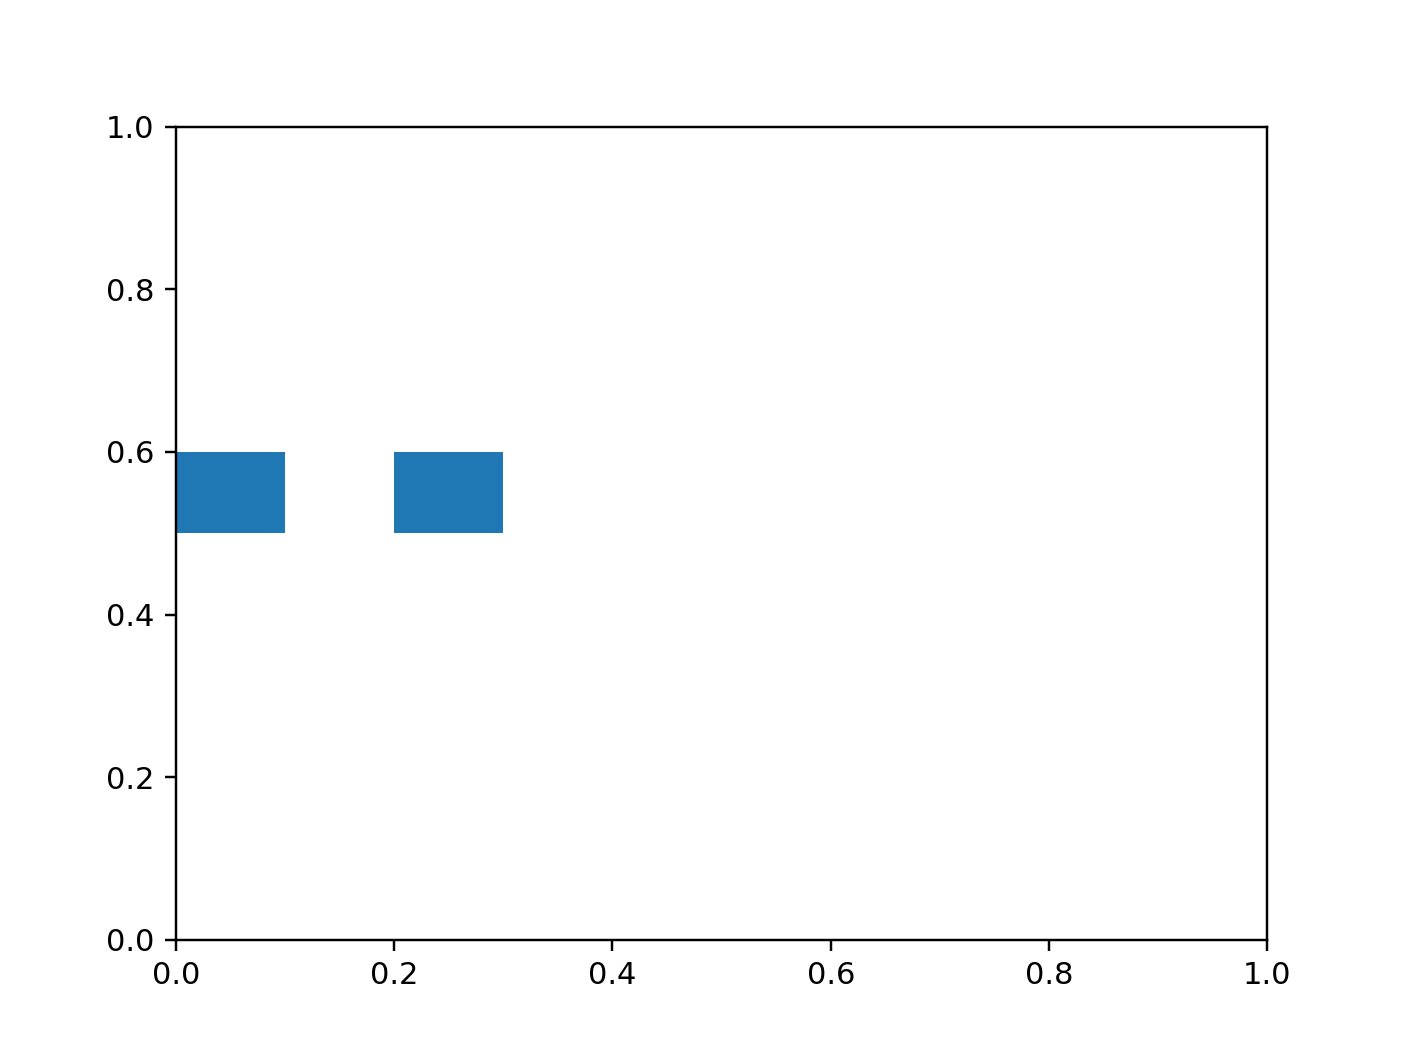

In [4]:
fig = plt.figure()
rescale_width, rescale_height = init_rescaling_funcs(fig)
r = fig.canvas.get_renderer()
ax = fig.get_axes()[0]

# Let's copy this patch.
p = patches.Rectangle((0, 0.5), 0.1, 0.1)
ax.add_patch(p)

p_width = p.get_window_extent(renderer=r).width
p_height = p.get_window_extent(renderer=r).height

p = patches.Rectangle((0.2, 0.5), rescale_width(p_width), rescale_height(p_height))
ax.add_patch(p)

plt.show()

# Demo: Writing text.

<IPython.core.display.Javascript object>


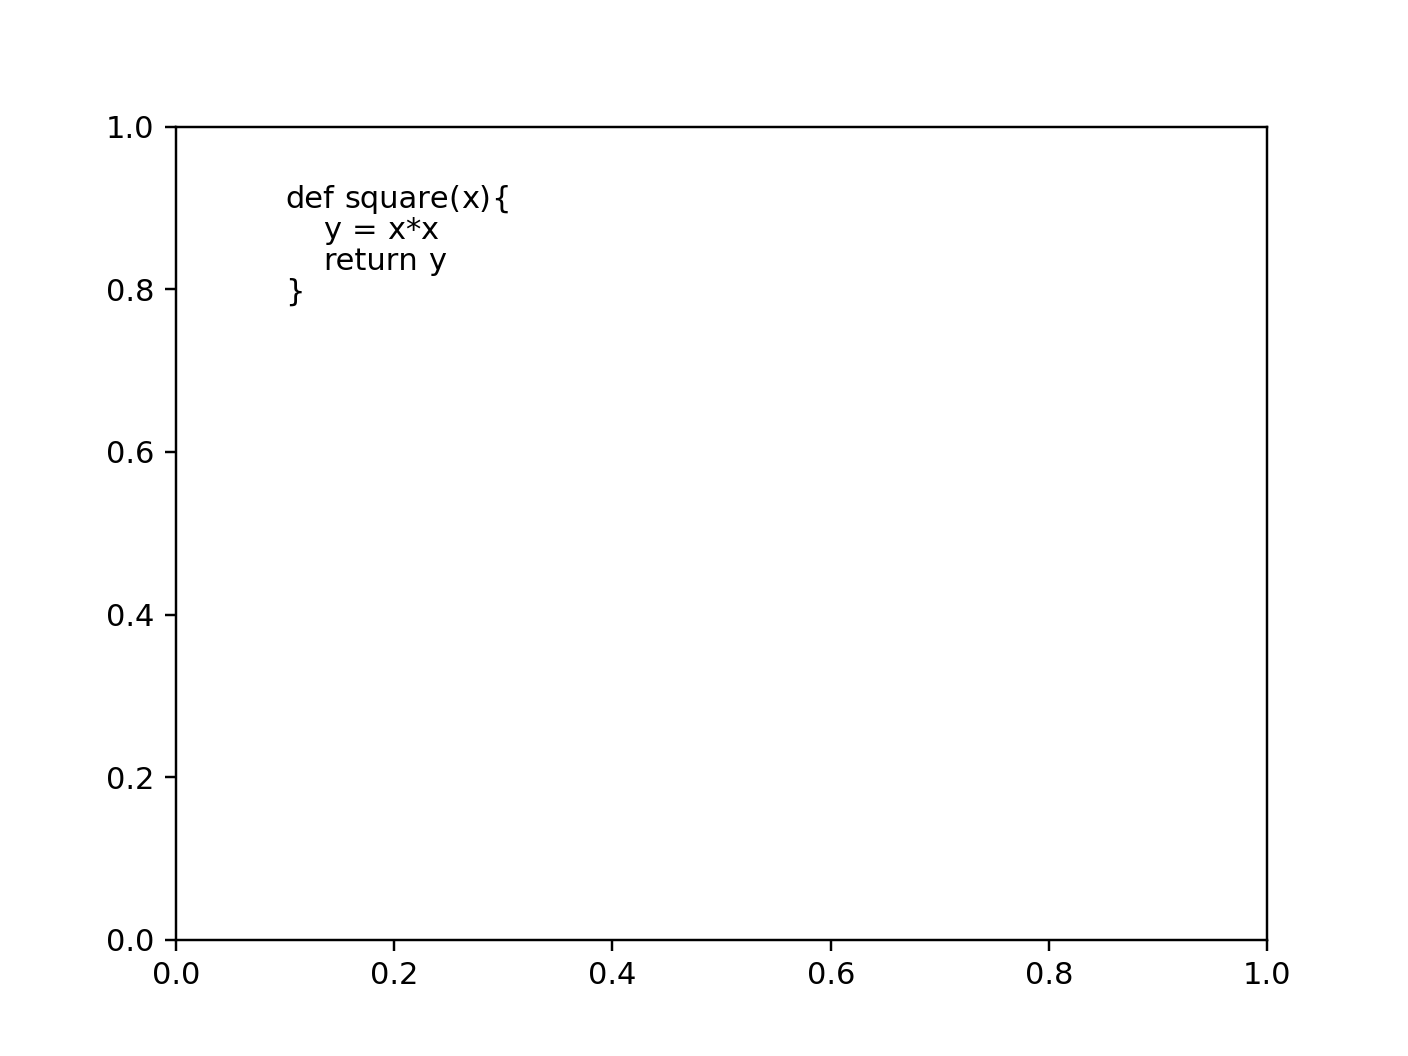

In [5]:
contents = [
    ['def', ' ', 'square', '(', 'x', ')', '{'],
    ['\t', 'y', ' ', '=', ' ', 'x', '*', 'x'],
    ['\t', 'return', ' ', 'y'],
    ['}'],
]


fig = plt.figure()
rescale_width, rescale_height = init_rescaling_funcs(fig)
r = fig.canvas.get_renderer()
ax = fig.get_axes()[0]

init_xoffset = 0.1
init_yoffset = 0.9

for i, line in enumerate(contents):
    if i == 0:
        xoffset = init_xoffset
        yoffset = init_yoffset
    else:
        xoffset = init_xoffset

    for w in line:
        if w == '\t':
            w = ' ' * 4
        t = plt.text(xoffset, yoffset, w, bbox=dict(pad=0, clip_on=False, fill=False, linewidth=0))
        t_width = t.get_window_extent(renderer=r).width
        xoffset += rescale_width(t_width)
    
    t_width = t.get_window_extent(renderer=r).height
    yoffset -= rescale_height(t_width)

plt.show()

# Demo: Writing text with fixed-width characters.

<IPython.core.display.Javascript object>


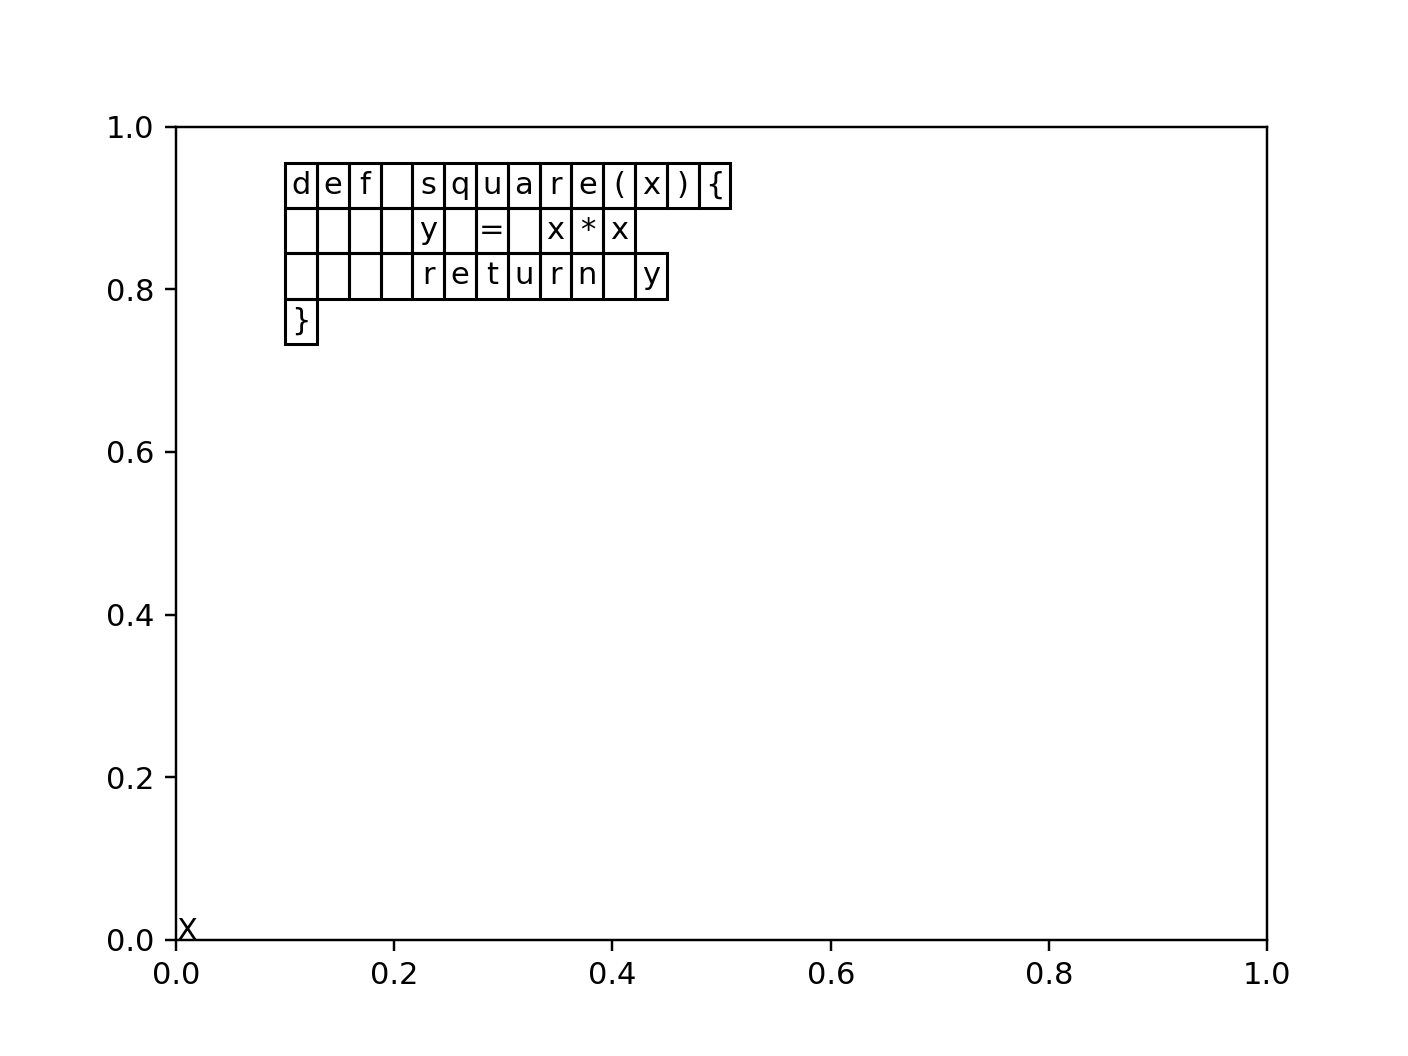

In [6]:
contents = [
    ['def', ' ', 'square', '(', 'x', ')', '{'],
    ['\t', 'y', ' ', '=', ' ', 'x', '*', 'x'],
    ['\t', 'return', ' ', 'y'],
    ['}'],
]


fig = plt.figure()
rescale_width, rescale_height = init_rescaling_funcs(fig)
r = fig.canvas.get_renderer()
ax = fig.get_axes()[0]

char = plt.text(0, 0, 'X')
char_width = rescale_width(char.get_window_extent(renderer=r).width) + 0.01
char_height = rescale_height(char.get_window_extent(renderer=r).width) + 0.03

init_xoffset = 0.1
init_yoffset = 0.9

for i, line in enumerate(contents):
    if i == 0:
        xoffset = init_xoffset
        yoffset = init_yoffset
    else:
        xoffset = init_xoffset

    for w in line:
        if w == '\t':
            w = ' ' * 4
        for c in w:
            # 1. Draw box.
            p = patches.Rectangle((xoffset, yoffset), char_width, char_height, fill=False)
            ax.add_patch(p)

            # 2. Draw character.
            t = plt.text(xoffset + char_width/2, yoffset + char_height/2, c,
                         horizontalalignment='center', verticalalignment='center',
                         bbox=dict(pad=0, fill=False, linewidth=0))
            xoffset += char_width
    
    yoffset -= char_height

plt.show()